In [233]:
import matplotlib.pyplot as plt 
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris # I found that sklearn have iris dataset built in
from sklearn.preprocessing import scale
import numpy as np 
import pandas as pd


In [315]:
iris = load_iris()
X = iris.data[::]
Y = iris.target[:]
# for convienience, I would represent setosa as -1, versicolor as 0, virinica as 1
for i in range(50):
    Y[i] = -1
    Y[i+50] = 0
    Y[i+100] = 1
# Split the data in to two parts, 66% used for train, 33% used for testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=66)

In [235]:
# Plotting function from scikit learn tutorial
#https://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot(models,x0,x1,xlabel,ylabel):
    titles = ('Linear','Poly degree = 3','RBF','LinearSVC')
    # set up 2x2 grid
    fig, sub = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    xx,yy = make_meshgrid(x0,x1)

    for clf, title, ax in zip(models, titles, sub.flatten()):
        plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(x0, x1, c=Y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

    plt.show()

In [300]:
# Linear Model
linear = svm.SVC(kernel = 'linear',gamma= 'auto',decision_function_shape='ovo').fit(X_train,Y_train)
print("Score:{}".format(linear.score(X_test,Y_test)))

Score:0.96


In [276]:
# Poly model with degree 3
poly = svm.SVC(kernel = 'poly',gamma= 'auto',decision_function_shape='ovo').fit(X_train,Y_train)
print("Score:{}".format(poly.score(X_test,Y_test)))

Score:0.96


In [277]:
# rbf model
rbf = svm.SVC(kernel = 'rbf',gamma= 'auto',decision_function_shape='ovo').fit(X_train,Y_train)
print("Score:{}".format(rbf.score(X_test,Y_test)))

Score:0.96


In [318]:
# seems like sigmoid model performs poorly, let change to other one
sigmoid = svm.SVC(kernel = 'sigmoid',gamma= 'auto',decision_function_shape='ovo').fit(X_train,Y_train)
print("Score:{}".format(sigmoid.score(X_test,Y_test)))

Score:0.28


In [279]:
linearSVC= svm.LinearSVC(max_iter = 5000).fit(X_train,Y_train)
print("Score:{}".format(linearSVC.score(X_test,Y_test)))

Score:0.94


In [321]:
def set_up_models(X,C):
    linear = svm.SVC(kernel = 'linear',gamma= 'auto',decision_function_shape='ovo',C=C).fit(X,Y_train)
    poly = svm.SVC(kernel = 'poly',gamma= 'auto',decision_function_shape='ovo',C=C).fit(X,Y_train)
    rbf = svm.SVC(kernel = 'rbf',gamma= 'auto',decision_function_shape='ovo',C=C).fit(X,Y_train)
    linearSVC= svm.LinearSVC(C=C,max_iter = 10000).fit(X,Y_train)
    return (linear,poly,rbf,linearSVC)

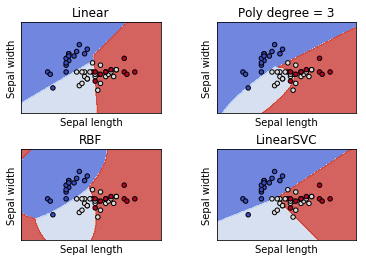

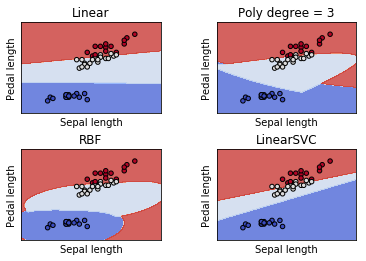

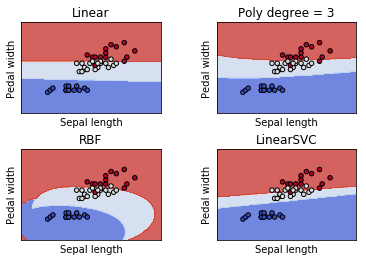

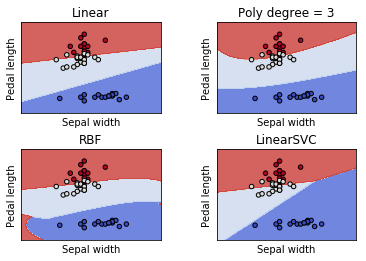

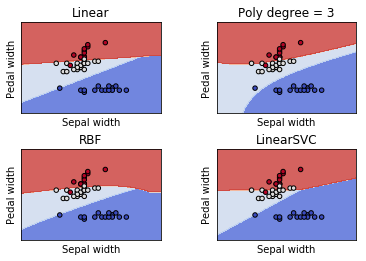

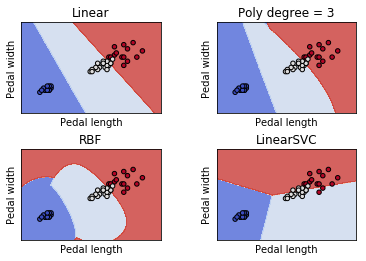

In [322]:
combinations = [(0,1),(0,2),(0,3),(1,2),(1,3),(2,3)]
features = ['Sepal length','Sepal width','Pedal length','Pedal width']
C=1.0
for _ in combinations:
    models = set_up_models(X_train[:,_],C=C)
    plot(models,X_test[:,_[0]],X_test[:,_[1]],features[_[0]],features[_[1]])

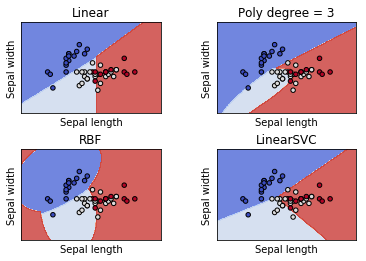

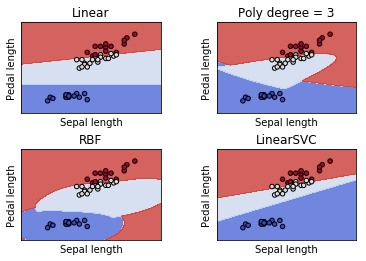

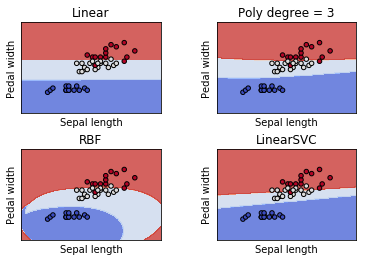

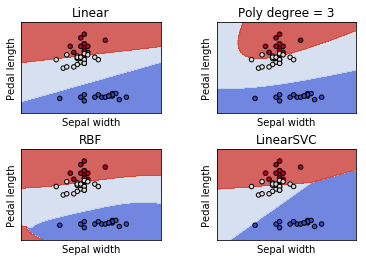

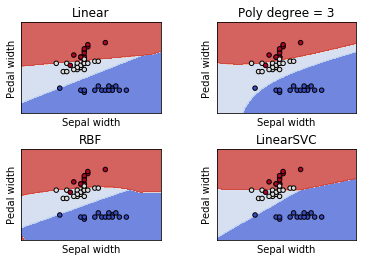

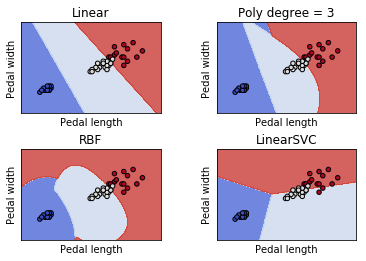

In [270]:
C = 2.0 
for _ in combinations:
    models = set_up_models(X_train[:,_],C=C)
    plot(models,X_test[:,_[0]],X_test[:,_[1]],features[_[0]],features[_[1]])

C:\Users\lianm\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


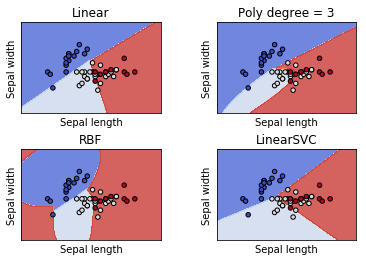

C:\Users\lianm\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


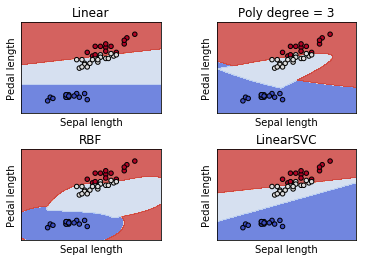

C:\Users\lianm\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


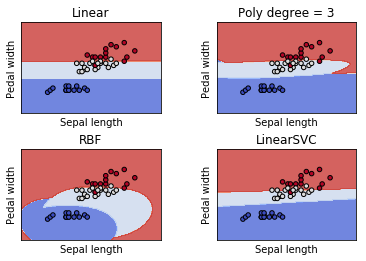

C:\Users\lianm\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


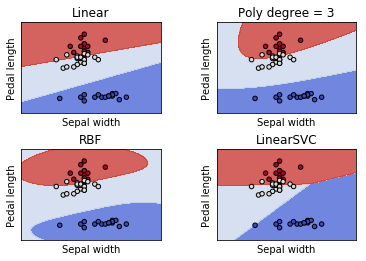

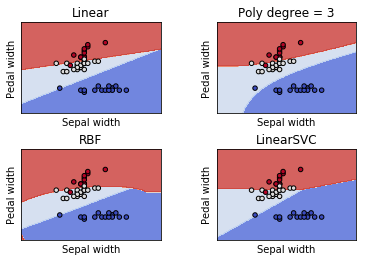

C:\Users\lianm\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


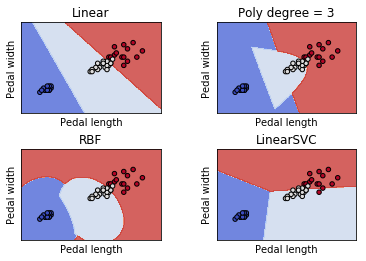

In [271]:
C = 10
for _ in combinations:
    models = set_up_models(X_train[:,_],C=C)
    plot(models,X_test[:,_[0]],X_test[:,_[1]],features[_[0]],features[_[1]])

C:\Users\lianm\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


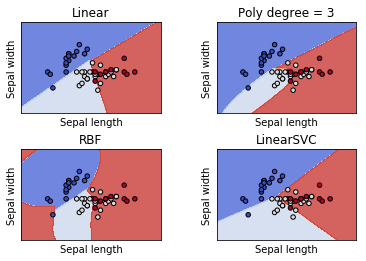

C:\Users\lianm\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


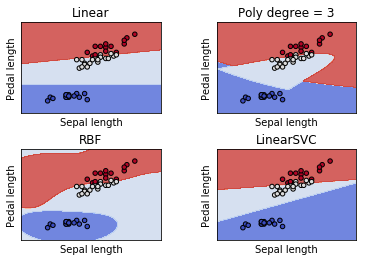

C:\Users\lianm\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


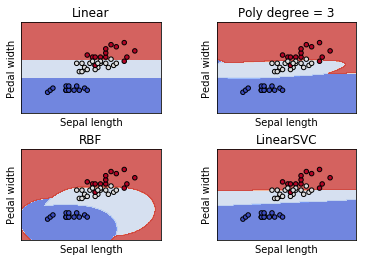

C:\Users\lianm\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


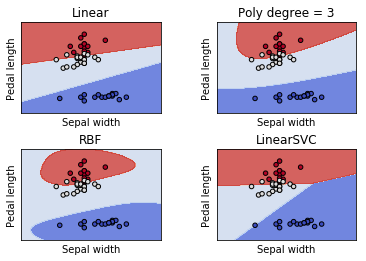

C:\Users\lianm\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


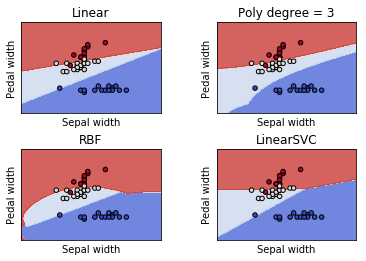

C:\Users\lianm\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


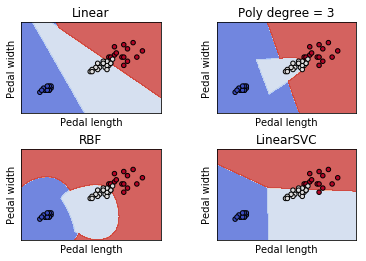

In [272]:
C = 2**5
for _ in combinations:
    models = set_up_models(X_train[:,_],C=C)
    plot(models,X_test[:,_[0]],X_test[:,_[1]],features[_[0]],features[_[1]])

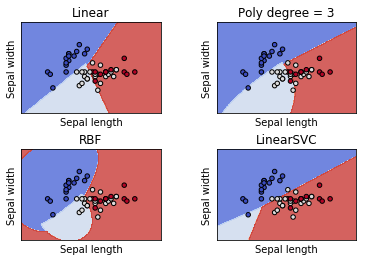

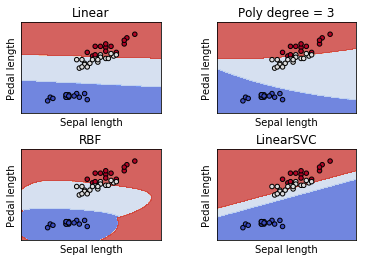

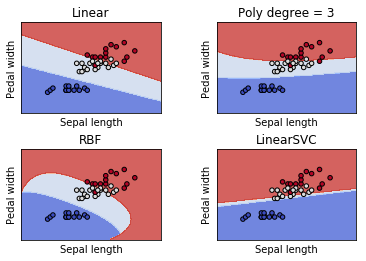

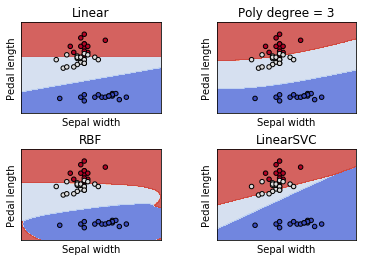

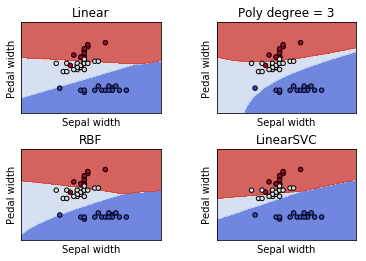

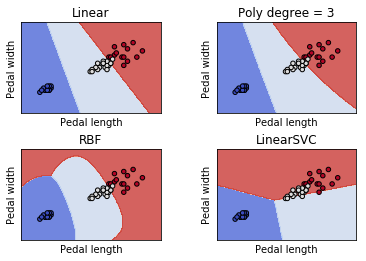

In [273]:
C = 0.1
for _ in combinations:
    models = set_up_models(X_train[:,_],C=C)
    plot(models,X_test[:,_[0]],X_test[:,_[1]],features[_[0]],features[_[1]])

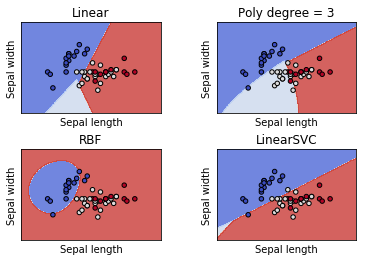

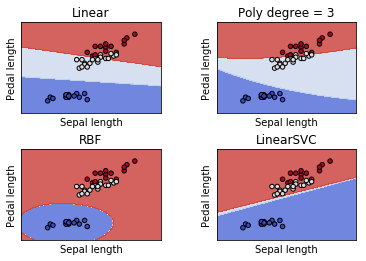

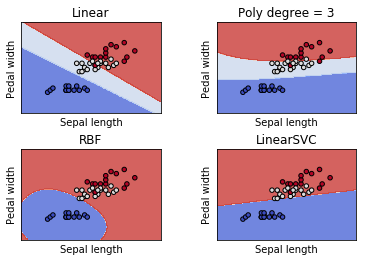

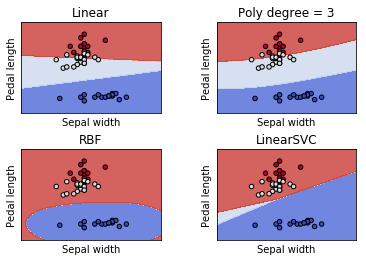

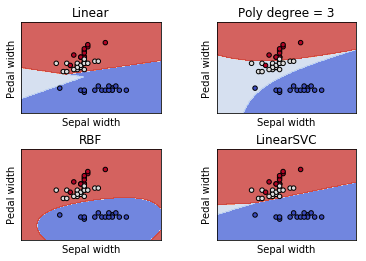

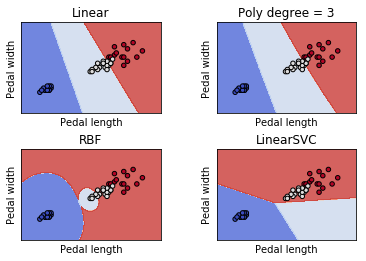

In [274]:
C = 2**-5
for _ in combinations:
    models = set_up_models(X_train[:,_],C=C)
    plot(models,X_test[:,_[0]],X_test[:,_[1]],features[_[0]],features[_[1]])

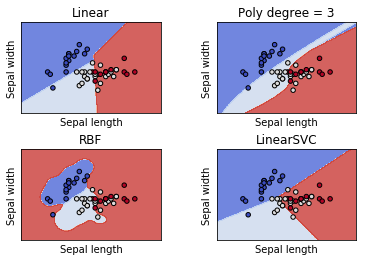

In [329]:
# Testing gammas
C=1
linear = svm.SVC(kernel = 'linear',gamma= 10,decision_function_shape='ovo',C=C).fit(X_train[:,(0,1)],Y_train)
poly = svm.SVC(kernel = 'poly',gamma= 10,decision_function_shape='ovo',C=C).fit(X_train[:,(0,1)],Y_train)
rbf = svm.SVC(kernel = 'rbf',gamma= 10,decision_function_shape='ovo',C=C).fit(X_train[:,(0,1)],Y_train)
linearSVC= svm.LinearSVC(C=C,max_iter = 10000).fit(X_train[:,(0,1)],Y_train)
models = (linear,poly,rbf,linearSVC)
plot(models,X_test[:,0],X_test[:,1],'Sepal length','Sepal width')

In [ ]:
"""
In this assignment, I used the train_test_split function provided by Scikit-Learn to split the testing and training data. I didn't do 
that in the previous logistic regression model as it takes about 50 samples for a logistic regression model to be significant. Which 
I don't have any samples extra for the test. 

With that being said, that start todays conversation. Notice that the graph I plotted are based on the training model that was
trained using 2 features at a time. Because I found that both the predict and decision_function method of the SVM require the 
training data and testing data to have exactly same number of features. Which means trainning use 4 features and testing use 2 features 
is unrealistic. However, the result of the predict or decision_function is needed in order to plot the graph. I didn't find a good
way to solve this problem after done some research in the web, people are suggesting put in some default value(such as the average
of the missing columns), I don't think that is a good idea as it defeats the purpose of training using 4 features
"""

In [ ]:
"""
First, lets compare the result. Based on the score of each model using 4 features(for comparing the result only, the model is discarded).
All linear,rbf(Gaussian),poly(degree 3) have the same accuracy of 96%, linearSVC closely behind with 94%, where sigmoid kernal(using 
similar idea as logistic regression) doesn't do so well, even if I modified the C,gamma value or change between ovo and ovr or even just 
doing a two classes classification. Seems like sigmoid function doesn't perform very well in classification of iris dataset. So I changed
to LinearSVC, which is similar to Linear kernel, only that LinearSVC miminzes the squares of hinge loss function, where linear
model just minimize the normal hinge loss function, and LinearSVC doesn't support ovo.

Analyzing the plots, we could easily finds out that both Linear and LinearSVC draw linear decision boundaries, where RBF and Poly could 
go with any kinds of shapes. This is expected with the defination of their kernel function.

By manipulating the C value and look at the corresponding plots, we could conclude that the higher the C is, the more "rigorous" the 
decision boundaries are, there is even a triangle forming if you examine the last plot in C=2**5. I think this implies a more 
serious overfitting. Where with small C, the decision boundaries are much more causal, in some cases the samples were even just 
classified in to two classes. This suggest underfitting. So choosing a good C seems pretty important in the SVM model.
Also, in the last I tested the how would different gamma's change the plot, seems like it's similar to C, higher gamma means more 
rigorous boundaries.

With those all being said, seems like SVM are a very useful classification tools, with different kernels, with a lot of adjustable 
parameters(I have just modified C and gamma), able to solve nonlinear seperable cases etc. From perceptron and Adaline, we have came a 
long way. Using the sigmoid kernel as evidence, I think yet again, we could not easily conclude which kernel is the best, it always 
depends, as if sigmoid kernal is this bad, it would not be implemented by scikit learn. We still need trials and error to find 
the best kernel to use, the best C and gammas. 

"""